In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"tamil_movie_dataset.csv", header=None, skiprows=1, names=["Title", "Year", "Genre", "Director", "Lead_Actor", "IMDB_Rating"])
print(df.head())

                Title  Year       Genre             Director  \
0              Vikram  2022      Action     Lokesh Kanagaraj   
1              Master  2021      Action     Lokesh Kanagaraj   
2  Ponniyin Selvan: I  2022  Historical          Mani Ratnam   
3              Jailer  2023      Action    Nelson Dilipkumar   
4          Love Today  2022     Romance  Pradeep Ranganathan   

            Lead_Actor  IMDB_Rating  
0         Kamal Haasan          8.4  
1                Vijay          7.8  
2           Jayam Ravi          7.7  
3          Rajinikanth          7.5  
4  Pradeep Ranganathan          8.2  


In [3]:
df.head()

,Title,Year,Genre,Director,Lead_Actor,IMDB_Rating
0,Vikram,2022,Action,Lokesh Kanagaraj,Kamal Haasan,8.4
1,Master,2021,Action,Lokesh Kanagaraj,Vijay,7.8
2,Ponniyin Selvan: I,2022,Historical,Mani Ratnam,Jayam Ravi,7.7
3,Jailer,2023,Action,Nelson Dilipkumar,Rajinikanth,7.5
4,Love Today,2022,Romance,Pradeep Ranganathan,Pradeep Ranganathan,8.2


In [4]:
movie_titles=pd.read_csv(r"movie_titles.csv")
movie_titles.head()

,item_id,Title,Language,Platform
0,1001,Vikram,Tamil,Theatre
1,1002,Master,Tamil,Hotstar
2,1003,Ponniyin Selvan: I,Tamil,Theatre
3,1004,Jailer,Tamil,Hotstar
4,1005,Love Today,Tamil,Amazon Prime


In [5]:
merged_df = pd.merge(df, movie_titles, on="Title", how="left")
merged_df.head()

,Title,Year,Genre,Director,Lead_Actor,IMDB_Rating,item_id,Language,Platform
0,Vikram,2022,Action,Lokesh Kanagaraj,Kamal Haasan,8.4,1001,Tamil,Theatre
1,Vikram,2022,Action,Lokesh Kanagaraj,Kamal Haasan,8.4,1013,Tamil,Amazon Prime
2,Vikram,2022,Action,Lokesh Kanagaraj,Kamal Haasan,8.4,1025,Tamil,Netflix
3,Vikram,2022,Action,Lokesh Kanagaraj,Kamal Haasan,8.4,1037,Tamil,Netflix
4,Vikram,2022,Action,Lokesh Kanagaraj,Kamal Haasan,8.4,1049,Tamil,Amazon Prime


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [7]:
df.groupby('Title')['IMDB_Rating'].mean().sort_values(ascending=False).head()


Title
Soorarai Pottru    8.7
96                 8.5
Asuran             8.5
Kaithi             8.5
Vikram             8.4
Name: IMDB_Rating, dtype: float64

In [8]:
df.groupby('Title')['IMDB_Rating'].count().sort_values(ascending=False).head()


Title
96        10
Asuran    10
Bigil     10
Jailer    10
Kaithi    10
Name: IMDB_Rating, dtype: int64

In [9]:
ratings = pd.DataFrame(df.groupby('Title')['IMDB_Rating'].mean())
ratings.head()


,IMDB_Rating
Title,
96,8.5
Asuran,8.5
Bigil,6.8
Jailer,7.5
Kaithi,8.5


In [10]:
# Create ratings DataFrame with average IMDb rating
ratings = pd.DataFrame(df.groupby('Title')['IMDB_Rating'].mean())

# Add number of ratings per movie
ratings['num of ratings'] = df.groupby('Title')['IMDB_Rating'].count()

# Preview the result
ratings.head()


,IMDB_Rating,num of ratings
Title,,
96,8.5,10
Asuran,8.5,10
Bigil,6.8,10
Jailer,7.5,10
Kaithi,8.5,10


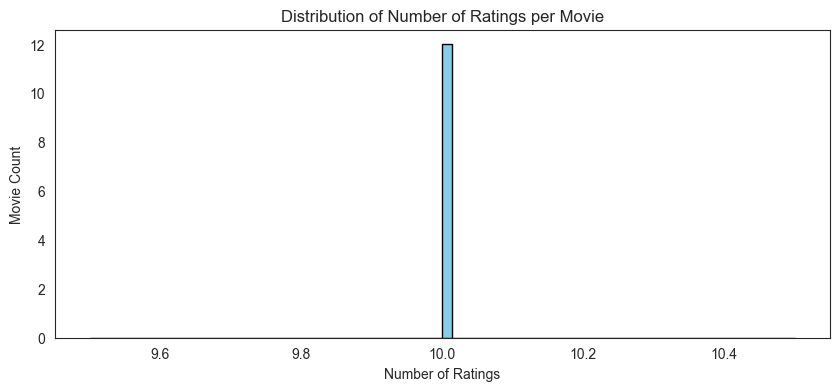

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
ratings['num of ratings'].hist(bins=70, color='skyblue', edgecolor='black')
plt.title("Distribution of Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Count")
plt.grid(False)
plt.show()


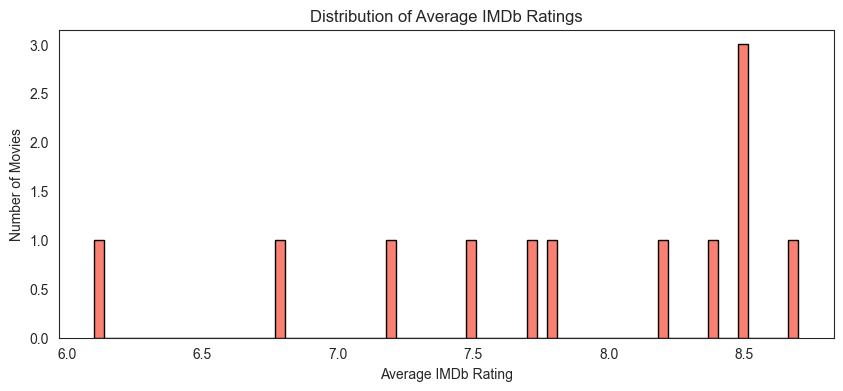

In [12]:
plt.figure(figsize=(10, 4))
ratings['IMDB_Rating'].hist(bins=70, color='salmon', edgecolor='black')
plt.title("Distribution of Average IMDb Ratings")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Number of Movies")
plt.grid(False)
plt.show()

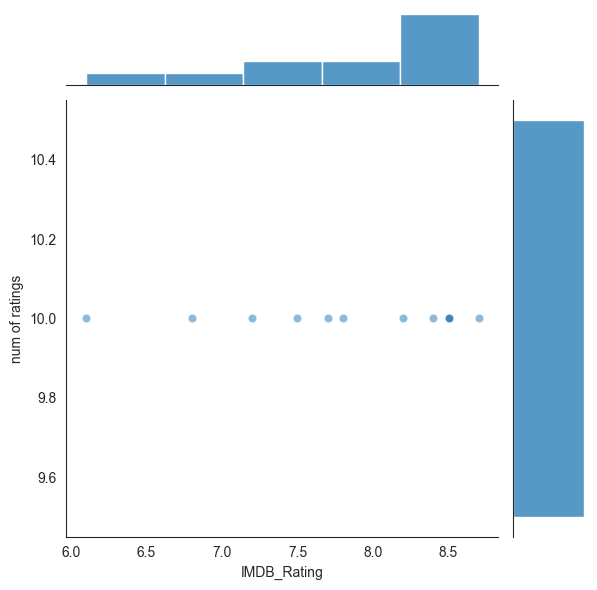

In [13]:
import seaborn as sns

sns.jointplot(x='IMDB_Rating', y='num of ratings', data=ratings, alpha=0.5)



In [14]:
import pandas as pd
import random

# Load your Tamil movie dataset
df = pd.read_csv(r"tamil_movie_dataset.csv", header=None, skiprows=1,
                 names=["Title", "Year", "Genre", "Director", "Lead_Actor", "IMDB_Rating"])
df = df[df["Title"] != "Title"].reset_index(drop=True)

# Generate synthetic user ratings
users = list(range(1, 51))  # 50 fake users
movies = df["Title"].unique().tolist()

ratings_data = []
for user in users:
    sampled_movies = random.sample(movies, k=random.randint(5, 10))  # each user rates 5–10 movies
    for movie in sampled_movies:
        rating = round(random.uniform(6.0, 10.0), 1)  # ratings between 6.0 and 10.0
        ratings_data.append({"user_id": user, "Title": movie, "rating": rating})

# Create DataFrame from the simulated ratings
ratings_df = pd.DataFrame(ratings_data)

# Create user-item matrix (pivot table)
moviemat = ratings_df.pivot_table(index='user_id', columns='Title', values='rating')

# Show the top of the matrix
moviemat.head()


Title,96,Asuran,Bigil,Jailer,Kaithi,Love Today,Master,Mersal,Ponniyin Selvan: I,Soorarai Pottru,Thunivu,Vikram
user_id,,,,,,,,,,,,
1,9.2,NaN,6.5,9.1,6.9,9.8,7.1,9.5,NaN,7.5,6.9,NaN
2,6.8,7.9,NaN,NaN,7.5,6.8,9.4,NaN,NaN,7.7,8.2,9.8
3,8.3,6.9,6.1,6.9,7.3,6.5,8.6,9.7,6.2,9.7,NaN,NaN
4,NaN,NaN,NaN,8.2,6.0,9.6,6.4,NaN,NaN,9.0,NaN,6.2
5,NaN,7.7,NaN,NaN,9.5,6.5,NaN,9.4,9.3,NaN,NaN,8.1


In [15]:
ratings = pd.DataFrame(df.groupby('Title')['IMDB_Rating'].mean())
ratings['num of ratings'] = df.groupby('Title')['IMDB_Rating'].count()


In [16]:
ratings.sort_values('num of ratings', ascending=False).head(10)


,IMDB_Rating,num of ratings
Title,,
96,8.5,10
Asuran,8.5,10
Bigil,6.8,10
Jailer,7.5,10
Kaithi,8.5,10
Love Today,8.2,10
Master,7.8,10
Mersal,7.2,10
Ponniyin Selvan: I,7.7,10


In [17]:
ratings.head()

,IMDB_Rating,num of ratings
Title,,
96,8.5,10
Asuran,8.5,10
Bigil,6.8,10
Jailer,7.5,10
Kaithi,8.5,10


In [18]:
vikram_ratings = moviemat['Vikram']
vikram_ratings.head()


user_id
1    NaN
2    9.8
3    NaN
4    6.2
5    8.1
Name: Vikram, dtype: float64

In [19]:
similar_movies = moviemat.corrwith(moviemat['Vikram'])
corr_vikram = pd.DataFrame(similar_movies, columns=['Correlation'])
corr_vikram.dropna(inplace=True)

# Add number of ratings
corr_vikram = corr_vikram.join(ratings['num of ratings'])

# Recommend movies similar to Vikram with at least 5 ratings
corr_vikram[corr_vikram['num of ratings'] > 5].sort_values('Correlation', ascending=False).head()


,Correlation,num of ratings
Title,,
Vikram,1.000000,10
Ponniyin Selvan: I,0.421028,10
Master,0.381528,10
Bigil,0.281806,10
Kaithi,0.218020,10


In [20]:
vikram_user_ratings = moviemat['Vikram']
similar_to_vikram = moviemat.corrwith(vikram_user_ratings)
corr_vikram = pd.DataFrame(similar_to_vikram, columns=['Correlation'])
corr_vikram.dropna(inplace=True)
corr_vikram = corr_vikram.join(ratings['num of ratings'])
recommendations = corr_vikram[corr_vikram['num of ratings'] > 5].sort_values('Correlation', ascending=False)
print(recommendations.head(10))

                    Correlation  num of ratings
Title                                          
Vikram                 1.000000              10
Ponniyin Selvan: I     0.421028              10
Master                 0.381528              10
Bigil                  0.281806              10
Kaithi                 0.218020              10
Love Today             0.142639              10
Thunivu                0.061164              10
Asuran                -0.119461              10
Mersal                -0.146430              10
Soorarai Pottru       -0.163308              10


In [21]:
print(moviemat.columns.tolist())


['96', 'Asuran', 'Bigil', 'Jailer', 'Kaithi', 'Love Today', 'Master', 'Mersal', 'Ponniyin Selvan: I', 'Soorarai Pottru', 'Thunivu', 'Vikram']


In [22]:
vikram_user_ratings = moviemat['Vikram']
similar_to_vikram = moviemat.corrwith(vikram_user_ratings)

corr_vikram = pd.DataFrame(similar_to_vikram, columns=['Correlation'])
corr_vikram.dropna(inplace=True)
corr_vikram.head()



,Correlation
Title,
96,-0.432437
Asuran,-0.119461
Bigil,0.281806
Jailer,-0.263079
Kaithi,0.218020


In [23]:
vikram_user_ratings = moviemat['Vikram']
similar_to_vikram = moviemat.corrwith(vikram_user_ratings)
corr_vikram = pd.DataFrame(similar_to_vikram, columns=['Correlation'])
corr_vikram.dropna(inplace=True)
corr_vikram = corr_vikram.join(ratings['num of ratings'])
recommendations = corr_vikram[corr_vikram['num of ratings'] > 5].sort_values('Correlation', ascending=False)
recommendations.head(10)

,Correlation,num of ratings
Title,,
Vikram,1.000000,10
Ponniyin Selvan: I,0.421028,10
Master,0.381528,10
Bigil,0.281806,10
Kaithi,0.218020,10
Love Today,0.142639,10
Thunivu,0.061164,10
Asuran,-0.119461,10
Mersal,-0.146430,10


In [ ]:
vikram_user_ratings = moviemat['Vikram']
similar_to_vikram = moviemat.corrwith(vikram_user_ratings)

corr_vikram = pd.DataFrame(similar_to_vikram, columns=['Correlation'])
corr_vikram.dropna(inplace=True)
corr_vikram = corr_vikram.join(ratings['num of ratings'])

corr_vikram[corr_vikram['num of ratings'] > 5].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
Title,,
Vikram,1.000000,10
Ponniyin Selvan: I,0.421028,10
Master,0.381528,10
Bigil,0.281806,10
Kaithi,0.218020,10


In [25]:
jailer_user_ratings = moviemat['Jailer']
similar_to_jailer = moviemat.corrwith(jailer_user_ratings)
corr_jailer = pd.DataFrame(similar_to_jailer, columns=['Correlation'])
corr_jailer.dropna(inplace=True)
corr_jailer = corr_jailer.join(ratings['num of ratings'])
corr_jailer[corr_jailer['num of ratings'] > 5].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
Title,,
Jailer,1.000000,10
96,0.727551,10
Love Today,0.396247,10
Asuran,0.306402,10
Soorarai Pottru,0.280018,10
